In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2870 - accuracy: 0.9171 - val_loss: 0.1689 - val_accuracy: 0.9519
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1300 - accuracy: 0.9611 - val_loss: 0.1157 - val_accuracy: 0.9663
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.0996 - val_accuracy: 0.9714
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0666 - accuracy: 0.9798 - val_loss: 0.0982 - val_accuracy: 0.9701
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0916 - val_accuracy: 0.9740
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0879 - val_accuracy: 0.9745
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0877 - val_accuracy:

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 711us/step


In [12]:
y_pred = y_prob.argmax(axis = 1)

In [13]:
accuracy_score(y_test,y_pred)

0.9795

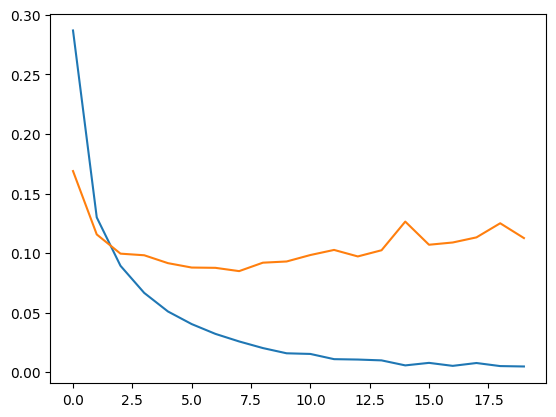

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

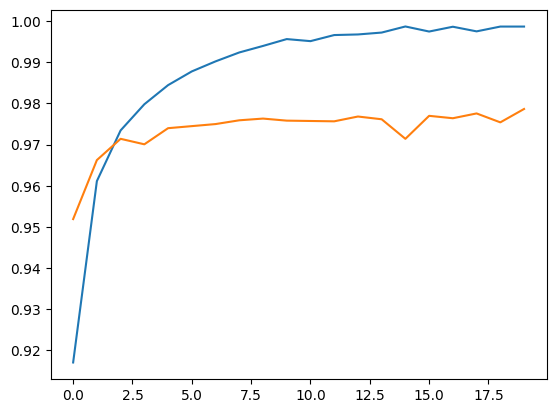

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])